# Novelty detection
- sklearn.mixture.GaussianMixture

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs

## 0. Sample dataset

In [45]:
# # 3 centers
# centers = [[1, 1], [-1, -1], [-1, 1]]

# 1 center
centers = [[0, 0]]

X, labels_true = make_blobs(n_samples=999, centers=centers, cluster_std=0.4, random_state=1234)

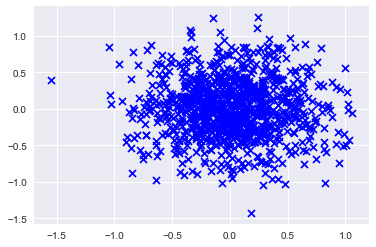

In [46]:
plt.scatter(X[labels_true == 0, 0], X[labels_true == 0, 1], marker='x', color='b')
plt.scatter(X[labels_true == 1, 0], X[labels_true == 1, 1], marker='x', color='c')
plt.scatter(X[labels_true == 2, 0], X[labels_true == 2, 1], marker='x', color='r')

## 1. one-class SVM

In [47]:
from sklearn.svm import OneClassSVM

In [48]:
ocsvm = OneClassSVM(kernel='rbf', gamma='auto')

In [49]:
ocsvm.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [50]:
result = ocsvm.predict(X)
# print(result)

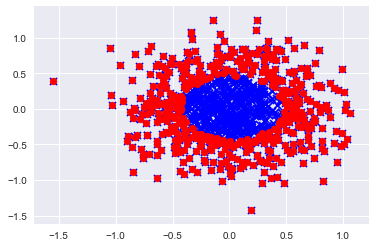

In [51]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[result==-1, 0], X[result==-1, 1], marker='o', color='r')

In [52]:
result = ocsvm.decision_function(X)
# print(result)

In [53]:
outliers = np.where(np.abs(result) >= 40)

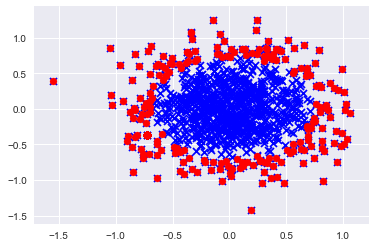

In [54]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[outliers, 0], X[outliers, 1], marker='o', color='r')

## 2. Isolation Forest

In [55]:
from sklearn.ensemble import IsolationForest

In [56]:
IsForest = IsolationForest()

In [57]:
IsForest.fit(X)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [58]:
result = IsForest.predict(X)
# print(result)

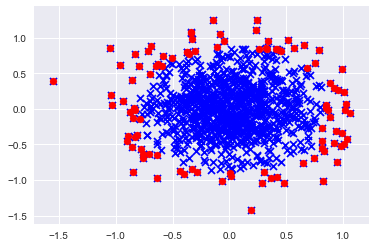

In [59]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[result==-1, 0], X[result==-1, 1], marker='o', color='r')

In [60]:
result = ocsvm.decision_function(X)
print(max(result))
print(min(result))

[ 28.30990999]
[-218.23590366]


In [61]:
outliers = np.where(np.abs(result) >= 40)

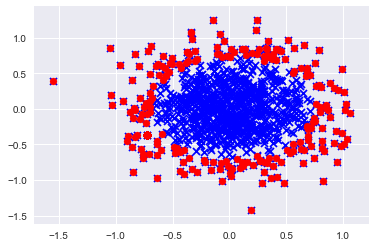

In [62]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[outliers, 0], X[outliers, 1], marker='o', color='r')

## 3. EllipticEnvelope

In [63]:
from sklearn.covariance import EllipticEnvelope

In [64]:
elliptic = EllipticEnvelope()

In [65]:
elliptic.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [66]:
result = elliptic.predict(X)
# print(result)

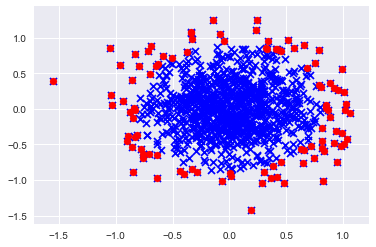

In [67]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[result==-1, 0], X[result==-1, 1], marker='o', color='r')

## 4. Gaussian Mixture Model

In [68]:
from sklearn.mixture import GaussianMixture

In [76]:
gmm = GaussianMixture(n_components=1)

In [77]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [78]:
# Calculate the log-probabilitiy of each sample
scores = gmm.score_samples(X)

In [79]:
# Calculate the probabilitiy of each esample
probs = np.exp(scores)

In [80]:
probs

array([  1.03768883e-01,   4.60429614e-01,   5.05374736e-01,
         1.54306416e-01,   1.41633764e-01,   5.08362171e-02,
         8.08248936e-01,   2.13049788e-01,   4.21813850e-01,
         3.66829639e-01,   5.56903225e-01,   9.33724291e-01,
         2.94715565e-01,   2.50456643e-01,   1.36105728e-01,
         6.55260651e-01,   2.39913219e-02,   1.93463557e-01,
         5.34501352e-01,   3.21013398e-01,   2.09807540e-01,
         2.48845926e-01,   7.73467844e-01,   8.17863607e-01,
         6.64200693e-01,   5.72583930e-01,   7.59986305e-01,
         5.14963157e-01,   6.35757451e-01,   7.38911156e-01,
         5.47439308e-01,   3.95424557e-01,   1.51246040e-01,
         4.80583208e-01,   4.98100021e-01,   9.27962279e-01,
         6.16967148e-01,   7.93251076e-01,   5.32428394e-01,
         1.62697574e-01,   3.73286135e-01,   4.62108906e-01,
         7.56327991e-01,   7.78586597e-01,   8.43952798e-01,
         7.75067851e-01,   3.36930368e-01,   8.31550205e-01,
         1.86551829e-01,

In [81]:
# If the probability is not bigger than 0.01, then corresponding points are considered as 'novelty'
outliers = np.where(probs <= 0.01)

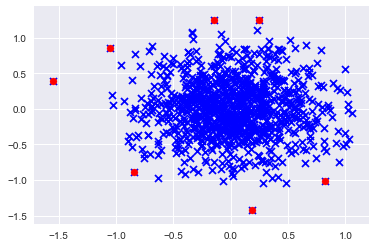

In [82]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[outliers, 0], X[outliers, 1], marker='o', color='r')

In [83]:
outliers = np.where(probs <= 0.02)

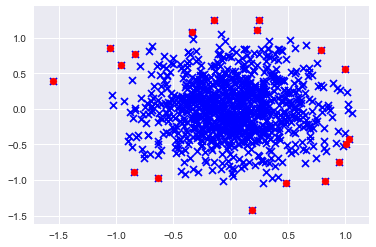

In [84]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[outliers, 0], X[outliers, 1], marker='o', color='r')

### Class version

In [85]:
class GaussianMixtureNovelty(GaussianMixture):
    def __init__(self, threshold, n_components=1, covariance_type='full', tol=1e-3,
                 reg_covar=1e-6, max_iter=100, n_init=1, init_params='kmeans',
                 weights_init=None, means_init=None, precisions_init=None,
                 random_state=None, warm_start=False,
                 verbose=0, verbose_interval=10):
        super().__init__(n_components=n_components, covariance_type=covariance_type, tol=tol,
                         reg_covar=reg_covar, max_iter=max_iter, n_init=n_init, init_params=init_params,
                         weights_init=weights_init, means_init=means_init, precisions_init=precisions_init,
                         random_state=random_state, warm_start=warm_start,
                         verbose=verbose, verbose_interval=verbose_interval)
        
        self.threshold = threshold
    
    def prob_samples(self, test_data):
        scores = self.score_samples(test_data)
        return np.exp(scores)
    
    def predict(self, test_data):
        probs = self.prob_samples(test_data)
        outliers = np.where(probs <= self.threshold)
        result = np.zeros(len(test_data))
        result[outliers] = 1
        return result

In [91]:
gmm_novelty = GaussianMixtureNovelty(n_components=1, threshold=0.02)

In [92]:
gmm_novelty.fit(X)

GaussianMixtureNovelty(covariance_type='full', init_params='kmeans',
            max_iter=100, means_init=None, n_components=1, n_init=1,
            precisions_init=None, random_state=None, reg_covar=1e-06,
            threshold=0.02, tol=0.001, verbose=0, verbose_interval=10,
            warm_start=False, weights_init=None)

In [93]:
gmm_novelty.prob_samples(X)

array([  1.03768883e-01,   4.60429614e-01,   5.05374736e-01,
         1.54306416e-01,   1.41633764e-01,   5.08362171e-02,
         8.08248936e-01,   2.13049788e-01,   4.21813850e-01,
         3.66829639e-01,   5.56903225e-01,   9.33724291e-01,
         2.94715565e-01,   2.50456643e-01,   1.36105728e-01,
         6.55260651e-01,   2.39913219e-02,   1.93463557e-01,
         5.34501352e-01,   3.21013398e-01,   2.09807540e-01,
         2.48845926e-01,   7.73467844e-01,   8.17863607e-01,
         6.64200693e-01,   5.72583930e-01,   7.59986305e-01,
         5.14963157e-01,   6.35757451e-01,   7.38911156e-01,
         5.47439308e-01,   3.95424557e-01,   1.51246040e-01,
         4.80583208e-01,   4.98100021e-01,   9.27962279e-01,
         6.16967148e-01,   7.93251076e-01,   5.32428394e-01,
         1.62697574e-01,   3.73286135e-01,   4.62108906e-01,
         7.56327991e-01,   7.78586597e-01,   8.43952798e-01,
         7.75067851e-01,   3.36930368e-01,   8.31550205e-01,
         1.86551829e-01,

In [94]:
predicted_class = gmm_novelty.predict(X)
print(predicted_class)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

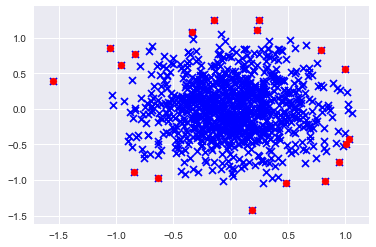

In [95]:
plt.scatter(X[:, 0], X[:, 1], marker='x', color='b')
plt.scatter(X[predicted_class==1, 0], X[predicted_class==1, 1], marker='o', color='r')

## 5. PCA and kernel PCA

In [96]:
from sklearn.decomposition import PCA, KernelPCA

In [97]:
pca = PCA(n_components='mle')

In [98]:
pca.fit(X)

TypeError: unorderable types: str() >= int()